In [13]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pyodbc


In [14]:
server = 'STG-ERP-7\SQLEXPRESS'
database = 'SSIS'
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes'
cn = pyodbc.connect(connection_string)

In [15]:
sql_query = 'SELECT * FROM dbo.Amazon1'

In [16]:
df = pd.read_sql(sql_query, cn)
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23692\3300308085.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, cn)


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,3bf9d82dad1bbf91be8303e967841d5d,90x90x16mm Children DIY Jewellrey Bracelets Bo...,k2-accessories Craft,Â£1.29,,3.0,1.0,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/90x90x16mm,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Melissa-Doug-Butterfly...,,Five Stars // 5.0 // 11 Oct. 2014 // By\n \...,
1,04b9b96078e6881c177313ca834b2006,"50 pieces 6mm ""S"" White Cube Individual Letter...",k2-accessories Alphabet Letter Beads,Â£1.85,2Â new,5.0,1.0,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/pieces-White-Individua...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/pieces-White-Alphabet-...,,Great product // 5.0 // 9 Feb. 2015 // By\n ...,
2,553ce4419106386d95c16c7613f52260,25 pieces 5x17mm Bronze Plated Angel Wings All...,k2-accessories Charm Pendants,Â£1.29,,1.0,1.0,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/Antique-Bronze-Mixed-C...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Antique-Bronze-Tibetan...,,great // 5.0 // 10 April 2014 // By\n \n ...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
3,1168e3966b3e74115c862e98b99364f9,50g / 2000 beads+ / 11/0 - 12/0 Rainbow Seed B...,k2-accessories Seed Beads,Â£0.99,,1.0,1.0,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/50g-2000-beads-11-Silv...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/50g-2000-beads-11-Silv...,,Great // 5.0 // 9 Aug. 2014 // By\n \n A...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
4,a3fa0e672024a860703f41e3361b6d65,Holder for the Coloured Bead Stair,Amazing child Montessori,Â£4.97,,4.0,1.0,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/Amazing-child-Montesso...,Traingular wooden board with grooves on which ...,Technical Details Manufacturer recommended age...,Traingular wooden board with grooves on which ...,,,Five Stars // 5.0 // 10 Feb. 2016 // By\n \...,


In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['number_of_answered_questions']])
df['number_of_answered_questions'] = scaler.transform(df[['number_of_answered_questions']])

scaler.fit(df[['number_of_reviews']])
df['number_of_reviews'] = scaler.transform(df[['number_of_reviews']])

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['number_of_reviews','number_of_answered_questions']])
    sse.append(km.inertia_)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

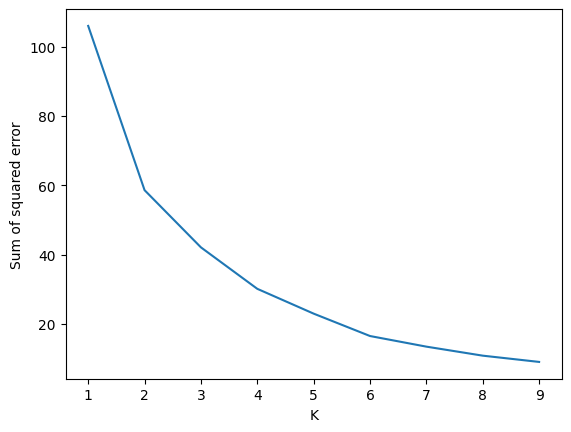

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [20]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['number_of_reviews','number_of_answered_questions']])
y_predicted

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [21]:
df['cluster']=y_predicted
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,cluster
0,3bf9d82dad1bbf91be8303e967841d5d,90x90x16mm Children DIY Jewellrey Bracelets Bo...,k2-accessories Craft,Â£1.29,,0.003741,0.025641,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/90x90x16mm,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Melissa-Doug-Butterfly...,,Five Stars // 5.0 // 11 Oct. 2014 // By\n \...,,0
1,04b9b96078e6881c177313ca834b2006,"50 pieces 6mm ""S"" White Cube Individual Letter...",k2-accessories Alphabet Letter Beads,Â£1.85,2Â new,0.006234,0.025641,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/pieces-White-Individua...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/pieces-White-Alphabet-...,,Great product // 5.0 // 9 Feb. 2015 // By\n ...,,0
2,553ce4419106386d95c16c7613f52260,25 pieces 5x17mm Bronze Plated Angel Wings All...,k2-accessories Charm Pendants,Â£1.29,,0.001247,0.025641,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/Antique-Bronze-Mixed-C...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Antique-Bronze-Tibetan...,,great // 5.0 // 10 April 2014 // By\n \n ...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",...",0
3,1168e3966b3e74115c862e98b99364f9,50g / 2000 beads+ / 11/0 - 12/0 Rainbow Seed B...,k2-accessories Seed Beads,Â£0.99,,0.001247,0.025641,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/50g-2000-beads-11-Silv...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/50g-2000-beads-11-Silv...,,Great // 5.0 // 9 Aug. 2014 // By\n \n A...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",...",0
4,a3fa0e672024a860703f41e3361b6d65,Holder for the Coloured Bead Stair,Amazing child Montessori,Â£4.97,,0.004988,0.025641,5.0 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/Amazing-child-Montesso...,Traingular wooden board with grooves on which ...,Technical Details Manufacturer recommended age...,Traingular wooden board with grooves on which ...,,,Five Stars // 5.0 // 10 Feb. 2016 // By\n \...,,0


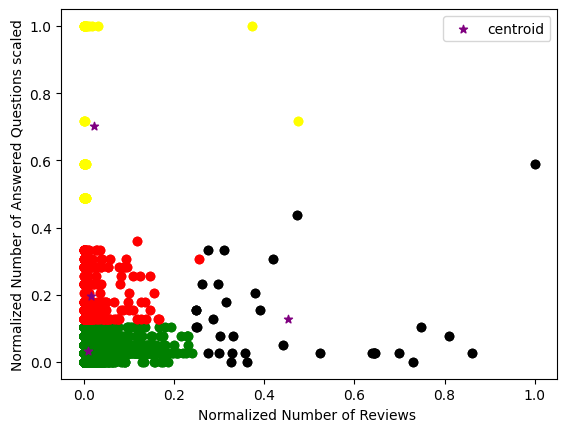

In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.number_of_reviews,df1['number_of_answered_questions'],color='green')
plt.scatter(df2.number_of_reviews,df2['number_of_answered_questions'],color='red')
plt.scatter(df3.number_of_reviews,df3['number_of_answered_questions'],color='black')
plt.scatter(df4.number_of_reviews,df4['number_of_answered_questions'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Normalized Number of Reviews ')
plt.ylabel('Normalized Number of Answered Questions scaled')
plt.legend()

In [24]:
cn.close()